__Objetivos__:

- Implementar as principais funções de ativação
- Entender intuitivamente como $w$ e $b$ influenciam nas funções de ativação

# Sumário

- [Linear](#Linear)
- [Sigmoid](#Sigmoid)
- [Tanh](#Tanh)
- [Rectified Linear Unit (ReLU)](#Rectified-Linear-Unit-(ReLU))
- [Leaky ReLU](#Leaky-ReLU)
- [Exponential Linear Unit (eLU)](#Exponential-Linear-Unit-(eLU))
- [Tabela das Funções de Ativação](#Tabela-das-Funções-de-Ativação)
- [Referências](#Referências)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from ipywidgets import interactive, fixed

%matplotlib inline

In [2]:
def plot_interactive(w, b, func, ylim=fixed((0, 1)), show_der=False):
    plt.figure(0)
    
    x = np.linspace(-10, 10, num=1000)
    z = w*x + b
    y = func(z)
    
    plt.plot(x, y, color='blue')
    if show_der:
        der = func(z, derivative=True)
        y_der_z = der
        y_der_x = w*der
        plt.plot(x, y_der_z, color='red')
        plt.plot(x, y_der_x, color='green')
    plt.xlim(-10, 10)
    plt.ylim(ylim[0], ylim[1])
    plt.show()

# Linear

$$y=x$$

$$y^\prime = 1$$

In [3]:
def linear(x,derivative=False):
    return np.ones_like(x) if derivative else x

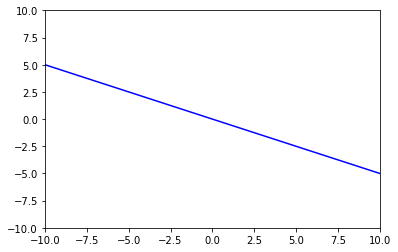

In [5]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 1.0), b=(-3, 3, 0.5), func=fixed(linear), ylim=fixed((-10, 10)))
interactive_plot

# Sigmoid 

$$y = \frac{1}{1+e^{-x}}$$

$$y^\prime = y(1-y)$$

In [6]:
def sigmoid(x,derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1-y)
    return 1.0 / (1.0 + np.exp(-x))

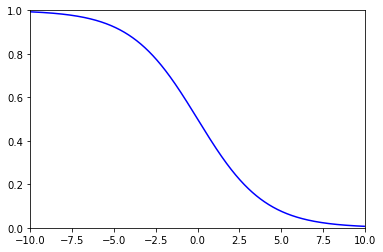

In [8]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 1.0), b=(-3, 3, 0.5), func=fixed(sigmoid))
interactive_plot

# Tanh

$$y = \frac{e^x - e^{-x}}{e^x+e^{-x}}$$

$$y^\prime = 1 - y^2$$

In [9]:
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1-y**2
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

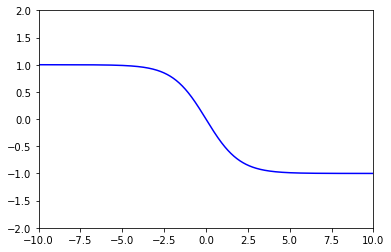

In [11]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 1.0), b=(-3, 3, 0.5), func=fixed(tanh), ylim=fixed((-2, 2)))
interactive_plot

# Rectified Linear Unit (ReLU)

$$y = max(0, x)$$

$$\frac{\partial y}{\partial x} = \begin{cases}0 &,\  x \leq 0\\1 &,\ x > 0\end{cases}$$

__Obs.__: Lembrando que a derivada da ReLU quando x = 0 não existe matematicamente, mas é convencionalmente definida como 0.

In [12]:
def relu(x,derivative=False):
    if derivative:
        return np.where(x<=0,0,1)
    return np.maximum(0,x)

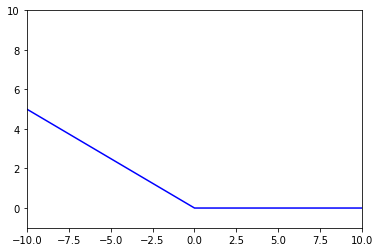

In [14]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 1.0), b=(-3, 3, 0.5), func=fixed(relu), ylim=fixed((-1, 10)))
interactive_plot

# Leaky ReLU 

$$y = \begin{cases}\alpha x &,\ x \leq 0\\x &,\ x > 0\end{cases}$$

$$\frac{\partial y}{\partial x} = \begin{cases}\alpha &,\  x \leq 0\\1 &,\  x > 0\end{cases}$$

In [15]:
def leaky_relu(x,derivative=False):
    alpha = 0.1
    if derivative:
        return np.where(x<=0,alpha,1)
    return np.where(x<=0,alpha*x,x)

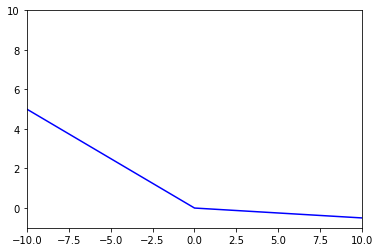

In [17]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 1.0), b=(-3, 3, 0.5), func=fixed(leaky_relu), ylim=fixed((-1, 10)))
interactive_plot

# Exponential Linear Unit (eLU) 

$$y = \begin{cases}\alpha(e^x -1) &,\ x \leq 0\\x &,\ x > 0\end{cases}$$

$$\frac{\partial y}{\partial x} = \begin{cases}y + \alpha &,\  x \leq 0\\1 &,\  x > 0\end{cases}$$

In [18]:
def elu(x,derivative=False):
    alpha = 1.0
    if derivative:
        y = elu(x)
        return np.where(x<=0,y+alpha,1)
    return np.where(x<=0,alpha*(np.exp(x) - 1),x)

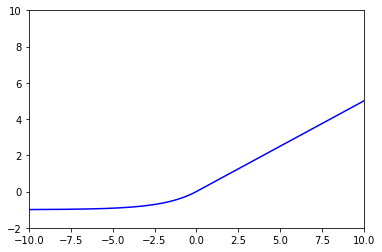

In [21]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 3.0), b=(-3, 3, 0.5), func=fixed(elu), ylim=fixed((-2, 10)))
interactive_plot

# Tabela das Funções de Ativação

<img src="images/funcoes_de_ativacao.png" width='700'>

# Referências

- [Tabela das funções de ativação](https://en.wikipedia.org/wiki/Activation_function)
- [Towards Data Science](https://medium.com/towards-data-science/activation-functions-neural-networks-1cbd9f8d91d6)
- [Stack Exchange](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons)